In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [5]:
G = nx.erdos_renyi_graph(6,0.4)

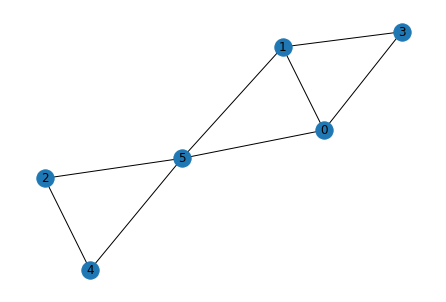

In [6]:
nx.draw(G, with_labels=True)

In [52]:
def mean_degree(G):
    N_nodes = len(G.nodes)
    total_k = 0
    for node in G.nodes:
        total_k+=G.degree[node]
    return total_k/N_nodes

In [64]:
H = G.subgraph([0,1,2,3])

In [65]:
H.edges

EdgeView([(0, 1), (1, 2), (1, 3), (2, 3)])

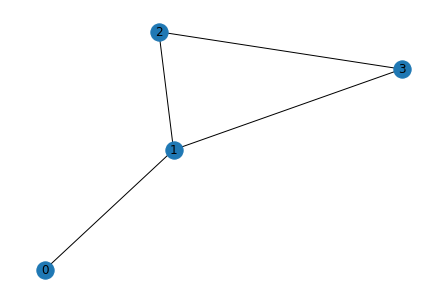

In [66]:
nx.draw(H, with_labels=True)

In [75]:
nx.average_clustering(G)

0.701904761904762

In [95]:
np.array(list(nx.clustering(G).values())).mean()

0.7019047619047619

Lets compute Degree distribution, Path length, Clustering coefficient, connected components

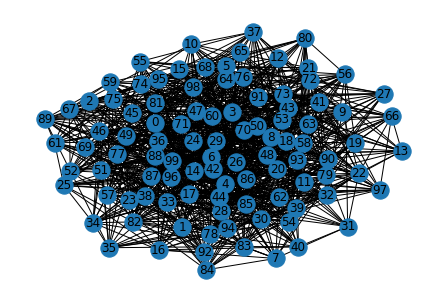

In [96]:
G = nx.erdos_renyi_graph(100,0.2)
nx.draw(G, with_labels=True)

In [97]:
degrees = []
for node in G.nodes:
    degrees.append(G.degree[node])

(array([ 3.,  8., 17., 20., 18., 13., 12.,  5.,  3.,  1.]),
 array([13. , 14.9, 16.8, 18.7, 20.6, 22.5, 24.4, 26.3, 28.2, 30.1, 32. ]),
 <BarContainer object of 10 artists>)

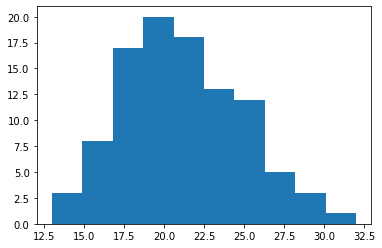

In [101]:
plt.hist(np.array(degrees))

In [102]:
mean_degree(G)

21.08

In [105]:
clusters = np.fromiter(nx.clustering(G).values(), dtype=float)

(array([ 3.,  2.,  4., 10., 20., 21., 26.,  9.,  3.,  2.]),
 array([0.125, 0.14 , 0.155, 0.17 , 0.185, 0.2  , 0.215, 0.23 , 0.245,
        0.26 , 0.275]),
 <BarContainer object of 10 artists>)

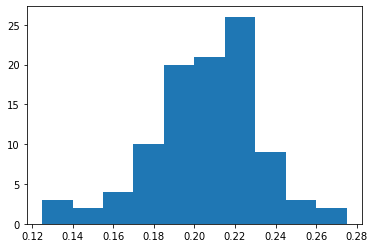

In [107]:
plt.hist(np.array(clusters))

In [112]:
N_nodes = len(G.nodes)
shortest_paths = []
for i in range(N_nodes):
    for j in range(i+1,N_nodes):
        shortest_paths.append(nx.shortest_path(G,i,j))
defined_paths = []
for path in shortest_paths:
    if len(path)==3:
        defined_paths.append(path[-1])

(array([ 54., 141., 214., 258., 338., 437., 463., 578., 652., 729.]),
 array([ 2. , 11.7, 21.4, 31.1, 40.8, 50.5, 60.2, 69.9, 79.6, 89.3, 99. ]),
 <BarContainer object of 10 artists>)

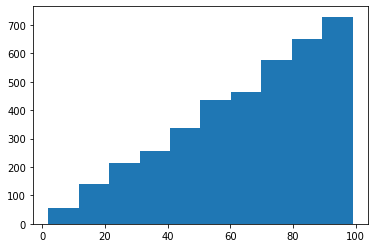

In [117]:
plt.hist(np.array(defined_paths))

In [119]:
np.array(defined_paths).min()

2

In [120]:
nx.is_connected(G)

True

Phase transitions of ER graphs

In [149]:
n = 10000
step = 0.000001
ratios = []
for p in np.arange(0,0.0001,step):
    G = nx.erdos_renyi_graph(n,p)
    largest_cc = max(nx.connected_components(G),key=len)
    ratios.append(len(largest_cc)/n)

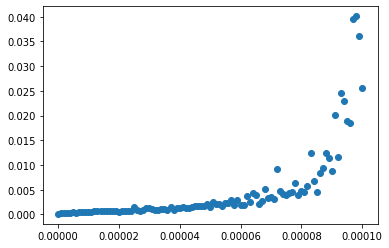

In [151]:
plt.scatter(np.arange(0,0.0001,step),np.array(ratios))

In [12]:
def extension(V_subgraph, G):
    extension = []
    for subgraph_node in V_subgraph:
        for node in G.nodes:
            if (subgraph_node,node) in G.edges:
                extension.append(node)
    return list(set(extension)-set(V_subgraph))

In [118]:
def extend_subgraph(V_subgraph,V_extension,G):
    v0 = V_subgraph[1]
    V_subgraph = V_subgraph[0]
    subgraphs = []
    extensions = []
    for u in V_extension:
        if u > v0:
            V_extended_subgraph = V_subgraph.copy()
            V_extended_subgraph.append(u)
            V_extension_updated = extension(V_extended_subgraph,G)
            subgraphs.append([V_extended_subgraph,v0])
            extensions.append(V_extension_updated)
    return subgraphs, extensions

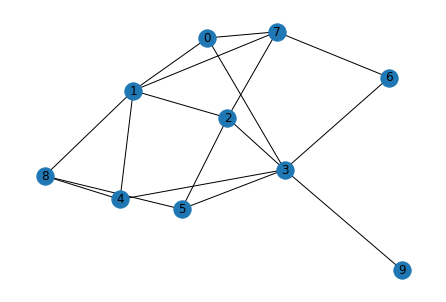

In [5]:
nx.draw(G, with_labels=True)

In [120]:
V_extension = extension([1,2],G)
V_subgraph = [[1,2],1]
subgraphs = []
extensions = []
v0 = 1

In [121]:
V_subgraphs,V_extensions = extend_subgraph(V_subgraph,V_extension,G)

In [7]:
def generate_subgraphs(G,depth):
    all_subgraphs = []
    for node in G.nodes:
        all_subgraphs.append([[node],node])
    all_extensions = [extension(node[0],G) for node in all_subgraphs]
    while not halt(all_subgraphs,all_extensions,depth):
        new_subgraphs = []
        new_extensions = []
        for pair in zip(subgraphs,extensions):
            extended_graphs, next_extensions = extend_subgraph(pair[0],pair[1],G)
            new_subgraphs+=extended_graphs
            new_extensions+=next_extensions
        all_subgraphs = new_subgraphs
        all_extensions = new_extensions
    return all_subgraphs

In [191]:
def halt(V_subgraphs,V_extensions,depth):
    for i in range(len(V_subgraphs)):
        if len(V_subgraphs[i][0])<depth and V_extensions[i] != []:
            return False
    return True

In [155]:
extensions = [extension(sub_G[0],G) for sub_G in subgraphs]

In [164]:
new_subgraphs = []
new_extensions = []
for pair in zip(subgraphs,extensions):
    extended_graphs, next_extensions = extend_subgraph(pair[0],pair[1],G)
    new_subgraphs+=extended_graphs
    new_extensions+=next_extensions
all_subgraphs = new_subgraphs
all_extensions = new_extensions

In [1]:
subgraphs_3 = generate_subgraphs(G,3)

NameError: name 'generate_subgraphs' is not defined

In [175]:
nx.draw(G, with_labels=True)